In [1]:
# !pip install black
# !pip install isort

In [2]:
import json
import random
from pathlib import Path
import pandas as pd

%load_ext autoreload
%autoreload 2
Path.ls = lambda x: list(x.iterdir())

In [3]:
from urllib.request import urlopen
import json
# from pandas.io.json import json_normalize
from pandas import json_normalize
response = urlopen("https://api.steinhq.com/v1/storages/5e6e3e9fb88d3d04ae08158c/CaseCountData")
json_data = response.read().decode('utf-8', 'replace')

d = json.loads(json_data)
df = json_normalize(d)
# df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
# df = df.set_index('TimeStamp')

df = pd.DataFrame(df)

In [4]:
df["ds"] = df["Date"]
country_name = "SouthKorea"
df["y"] = df[f"{country_name}"]

In [5]:
df = df.drop(columns = [f"{country_name}", "Date"])

In [6]:
df.head()

,DataType,Italy,India,Kerala,Bangalore,Karnataka,DelhiState,Indonesia,ds,y
0,Fact,3,3,None,0,None,None,None,Feb 15,28
1,Fact,3,3,None,0,0,None,None,Feb 16,29
2,Fact,3,3,None,0,0,None,None,Feb 17,30
3,Fact,3,3,None,0,0,None,None,Feb 18,31
4,Fact,3,3,None,0,0,None,None,Feb 19,58


In [7]:
from datetime import datetime
def parse_date(input_string: str)->str:
    return datetime.strptime(f'{input_string} 2020', '%b %d %Y')

In [8]:
df["ds"] = df["ds"].apply(parse_date)

In [9]:
# df["ds"]

In [10]:
from fbprophet import Prophet

In [11]:
m = Prophet(daily_seasonality=True, yearly_seasonality=True, n_changepoints=5)
m.fit(df)

In [12]:
future = m.make_future_dataframe(periods=2)
# future.tail()

In [13]:
# future
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
47,2020-04-02,118385.113607,118278.985232,118483.135699
48,2020-04-03,128997.885351,128893.787513,129098.188500
49,2020-04-04,139272.347919,139172.494156,139376.537671
50,2020-04-05,148767.837821,148664.972473,148870.090475
51,2020-04-06,157312.274650,157211.536280,157413.346883


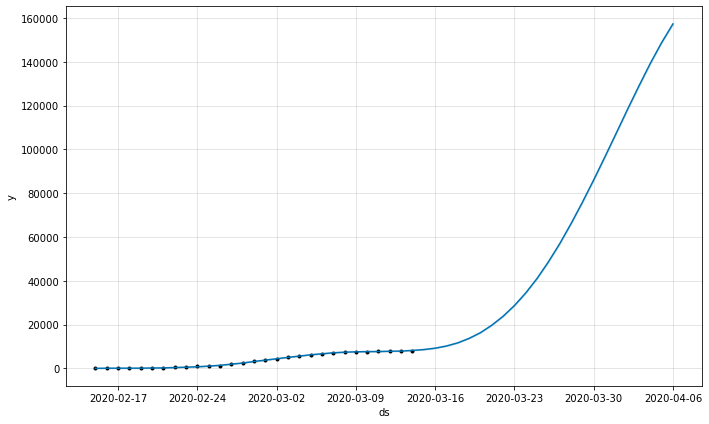

In [14]:
fig1 = m.plot(forecast)

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-15,3299.058599,-114.703903,85.045725,3299.058599,3299.058599,-3313.644676,-3313.644676,-3313.644676,52741.684114,...,53.025563,53.025563,53.025563,-56108.354353,-56108.354353,-56108.354353,0.0,0.0,0.0,-14.586077
1,2020-02-16,3185.789303,-46.585224,155.187408,3185.789303,3185.789303,-3140.137320,-3140.137320,-3140.137320,52741.684114,...,40.282943,40.282943,40.282943,-55922.104376,-55922.104376,-55922.104376,0.0,0.0,0.0,45.651983
2,2020-02-17,3072.520007,-41.925171,157.917517,3072.520007,3072.520007,-3011.898877,-3011.898877,-3011.898877,52741.684114,...,3.433058,3.433058,3.433058,-55757.016049,-55757.016049,-55757.016049,0.0,0.0,0.0,60.621130
3,2020-02-18,2959.250711,-27.045592,171.142770,2959.250711,2959.250711,-2886.923800,-2886.923800,-2886.923800,52741.684114,...,-18.895877,-18.895877,-18.895877,-55609.712037,-55609.712037,-55609.712037,0.0,0.0,0.0,72.326911
4,2020-02-19,2845.981415,-31.233326,171.176339,2845.981415,2845.981415,-2778.381737,-2778.381737,-2778.381737,52741.684114,...,-50.168354,-50.168354,-50.168354,-55469.897497,-55469.897497,-55469.897497,0.0,0.0,0.0,67.599678
5,2020-02-20,2732.712119,50.537178,258.619611,2732.712119,2732.712119,-2580.959658,-2580.959658,-2580.959658,52741.684114,...,-0.096991,-0.096991,-0.096991,-55322.546781,-55322.546781,-55322.546781,0.0,0.0,0.0,151.752461
6,2020-02-21,2619.442823,82.281583,293.572259,2619.442823,2619.442823,-2436.014442,-2436.014442,-2436.014442,52741.684114,...,-27.580342,-27.580342,-27.580342,-55150.118214,-55150.118214,-55150.118214,0.0,0.0,0.0,183.428381
7,2020-02-22,2506.173527,265.223228,469.043260,2506.173527,2506.173527,-2139.979686,-2139.979686,-2139.979686,52741.684114,...,53.025563,53.025563,53.025563,-54934.689363,-54934.689363,-54934.689363,0.0,0.0,0.0,366.193842
8,2020-02-23,2392.904232,415.691038,619.633499,2392.904232,2392.904232,-1877.945258,-1877.945258,-1877.945258,52741.684114,...,40.282943,40.282943,40.282943,-54659.912315,-54659.912315,-54659.912315,0.0,0.0,0.0,514.958973
9,2020-02-24,2279.634936,613.645543,811.865206,2279.634936,2279.634936,-1567.582178,-1567.582178,-1567.582178,52741.684114,...,3.433058,3.433058,3.433058,-54312.699350,-54312.699350,-54312.699350,0.0,0.0,0.0,712.052758


In [19]:
# mini_df = forecast[["ds", "yhat"]]
mini_df = forecast[["yhat"]]
mini_df["yhat"] = mini_df["yhat"].apply(int)
mini_df.to_csv(f"{country_name}-Forecast.csv", index=False)
filename = f"{country_name}-Forecast.csv"
!tail -n 23 $filename

8568
9198
10195
11629
13679
16275
19682
23767
28653
34412
41034
48596
56900
66065
75793
86028
96657
107479
118385
128997
139272
148767
157312


/Users/nirant/miniconda3/envs/corona/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
# fig2 = m.plot_components(forecast)